In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
# sys.path.append('../')
sys.path.append('../')
sys.path.append('../model')
sys.path.append('../cost')
sys.path.append('../constraints')
import UnicycleModel
import UnicycleCost
import UnicycleConstraints
from scipy.integrate import solve_ivp
from Scvx import Scvx

In [3]:
ix = 3
iu = 2
ih = 2
N = 100
delT = 0.1
max_iter = 30

In [40]:
xi = np.zeros(3)
xi[0] = -2.0
xi[1] = -2.0 
xi[2] = 0

xf = np.zeros(3)
xf[0] = 2.0
xf[1] = 2.0
xf[2] = 0

myModel = UnicycleModel.unicycle('Hello',ix,iu,delT)
myCost = UnicycleCost.unicycle('Hello',ix,iu,N)
myConst = UnicycleConstraints.UnicycleConstraints('Hello',ix,iu,ih)

x0 = np.zeros((N+1,ix))
for i in range(N+1) :
    x0[i] = (N-i)/N * xi + i/N * xf
# u0 = np.random.rand(N,iu)
u0 = np.zeros((N,iu))

In [41]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost,myConst,tol_tr=1e-3,tol_bc=1e-1,w_tr = 1)
_,_,x,u = i1.update(x0,u0)

Boundary conditions are not satisified: just accept this step
iteration   cost        ||vc||    ||tr||    reduction    expected    w_tr
0           0           0           0           -4.01e+04   -4.01e+04   1.0         
Boundary conditions are not satisified: just accept this step
1           80          4           1.6         3.99e+04    3.99e+04    1.0         
Boundary conditions are not satisified: just accept this step
non-positive expected reduction
2           140         6.32e-12    15.1        -27.6       -27.6       1.0         
Boundary conditions are not satisified: just accept this step
non-positive expected reduction
3           179         4.22e-11    4.36        -15.2       -15.2       1.0         
non-positive expected reduction
4           197         4.46e-10    1.12        -10.5       -10.5       1.0         
non-positive expected reduction
5           208         4.24e-11    0.142       -0.424      -0.424      1.0         
non-positive expected reduction
6       

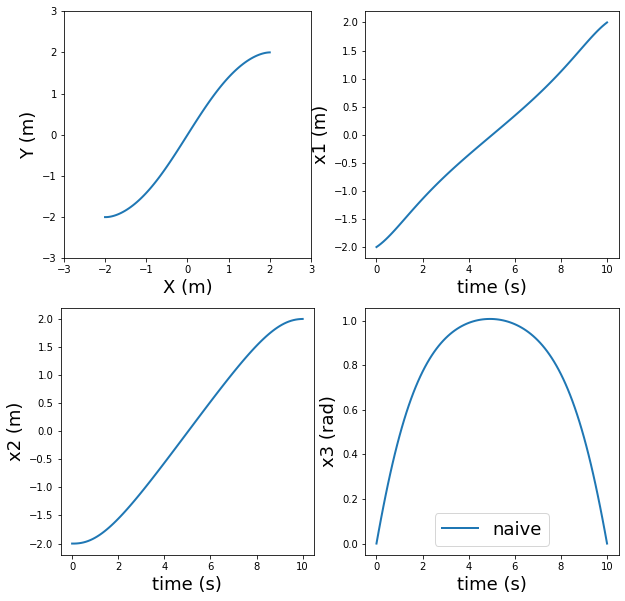

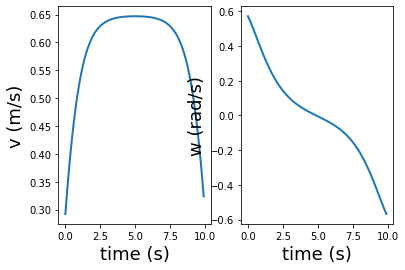

In [42]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
# plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-3, 3, -3, 3])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()